## Classificador linear passo a passo - 2D 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Base de dados :

In [4]:
data = pd.read_csv('iris.csv', header = None)
print(data)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## Transformação das classes :

In [5]:
# data = data[:100] # first 100 rows from the dataset
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', -1, 1) # modifies the last column to -1 if Iris-setosa, 1 otherwise
print(data)

       0    1    2    3  4
0    5.1  3.5  1.4  0.2 -1
1    4.9  3.0  1.4  0.2 -1
2    4.7  3.2  1.3  0.2 -1
3    4.6  3.1  1.5  0.2 -1
4    5.0  3.6  1.4  0.2 -1
..   ...  ...  ...  ... ..
145  6.7  3.0  5.2  2.3  1
146  6.3  2.5  5.0  1.9  1
147  6.5  3.0  5.2  2.0  1
148  6.2  3.4  5.4  2.3  1
149  5.9  3.0  5.1  1.8  1

[150 rows x 5 columns]


## Preparação da base de dados para utilização no classificador :

In [ ]:
xo = np.ones(100) # numpy array with all values to one, representing the intercept term (bias) in the feature matrix

features = np.asmatrix([xo, data[0] , data[2]]) # creates the feature matrix

features = features.transpose() #ajuste da matriz de features

print(features[:10,:])

[[1.  5.1 1.4]
 [1.  4.9 1.4]
 [1.  4.7 1.3]
 [1.  4.6 1.5]
 [1.  5.  1.4]
 [1.  5.4 1.7]
 [1.  4.6 1.4]
 [1.  5.  1.5]
 [1.  4.4 1.4]
 [1.  4.9 1.5]]


In [6]:
labels = np.array(data[4]) #target de cada linha da base de dados
print(labels[:100])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Visualização das classes :

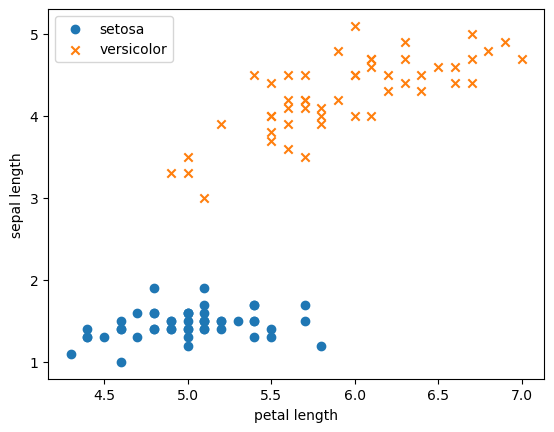

In [7]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

### Machine Learning "From scratch"

Modelo Matemático:

$x_1, x_2 \rightarrow{}$ features

$y \rightarrow{}$ target

$\hat{y_{i}} = w_2x_{2}^{(i)}+w_1x_{1}^{(i)}+w_0x_{0}^{(i)}=w^{T}X^{(i)}$ $\rightarrow{}$ target estimado

Não há erro se $\rightarrow{} y_{i}\hat{y}_{i} = y_{i}(w^{T}X^{(i)}) \geq 0$

$Erro = \{X^{(i)} \mid y_{i}(w^{T}X^{(i)})< 0\} \rightarrow$ erro gerado para cada linha da base de dados

$Custo(\hat{y_{i}})= Custo(w_{2}, w_{1}, w_{0}) = -\sum_{i=1\mid X_{i}\in E}^{N}y_{i}(w^{T}X^{(i)}) \rightarrow{}$ função custo para cada equação da reta estimada

$\frac{\partial (Custo)}{\partial w_{0}} = -\sum_{i=1\mid X_{i}\in E}^{N}y_{i}x_{0}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{0}$ da equação da reta

$\frac{\partial (Custo)}{\partial w_{1}} = -\sum_{i=1\mid X_{i}\in E}^{N}y_{i}x_{1}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{1}$ da equação da reta

$\frac{\partial (Custo)}{\partial w_{2}} = -\sum_{i=1\mid X_{i}\in E}^{N}y_{i}x_{2}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{2}$ da equação da reta

$\frac{\partial (Custo)}{\partial w_{0}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{0}$

$\frac{\partial (Custo)}{\partial w_{1}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{1}$

$\frac{\partial (Custo)}{\partial w_{2}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{2}$

Modelo computacional:

- escolher parâmetros inciais $w_{2}$, $w_{1}$ e $w_{0}$
- calcular $\hat{y_{i}}$ para todas as linhas da base de dados
- calcular função Custo
- atualizar os parâmetros $w_{2}$, $w_{1}$ e $w_{0}$ a cada iteração, fazendo:

    - $w_{0} \leftarrow w_{0}+\alpha \frac{\partial (Custo)}{\partial w_{0}}$
    - $w_{1} \leftarrow w_{1}+\alpha \frac{\partial (Custo)}{\partial w_{1}}$
    - $w_{2} \leftarrow w_{2}+\alpha \frac{\partial (Custo)}{\partial w_{2}}$

## Inicialização e parâmetros do classificador :

In [8]:
w = np.array([0, 0.1, 1]).reshape(-1,3)

misclassified_ = [] 

misclassified = 0

print('Inicializacao dos coeficientes w do classificador =', w)

Inicializacao dos coeficientes w do classificador = [[0.  0.1 1. ]]


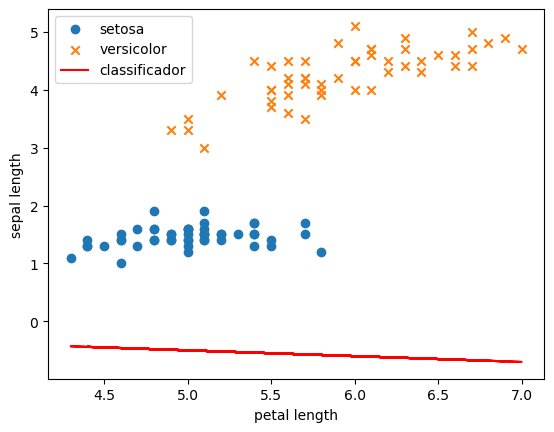

In [9]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classificador', color='red')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## Algoritmo classificador passo a passo:

### $1^{a}$ iteração

In [10]:
x = features[0]
y = labels[0]
print('Valores das features na primeira linha da base de dados =', x)
print('Valor do target na primeira linha da base de dados =', y)
print('Valores dos coeficientes w do classificador =', w)

Valores das features na primeira linha da base de dados = [[1.  5.1 1.4]]
Valor do target na primeira linha da base de dados = -1
Valores dos coeficientes w do classificador = [[0.  0.1 1. ]]


In [11]:
y_hat = np.dot(w, x.transpose())
print('Valor do label estimado da primeira linha da base de dados =', y_hat)

Valor do label estimado da primeira linha da base de dados = [[1.91]]


In [12]:
classe = 1.0 if (y_hat > 0) else -1.0 #verificacao se o valor encontrado corresponde a classe correta
print('Valor da classe estimada da primeira linha da base de dados =', classe)

Valor da classe estimada da primeira linha da base de dados = 1.0


In [13]:
erro = (classe * y)
print('Valor do erro da primeira linha da base de dados =', erro)

Valor do erro da primeira linha da base de dados = -1.0


In [14]:
if(erro <= 0):
    misclassified += 1
    w += 0.05*(y * x)
    
print('Valores dos coeficientes w do classificador após 1a iteração =', w)

Valores dos coeficientes w do classificador após 1a iteração = [[-0.05  -0.155  0.93 ]]


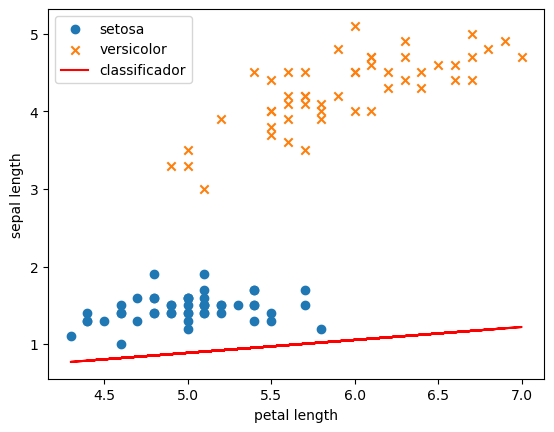

In [15]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classificador', color='red')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [16]:
misclassified_.append(erro)
print('Erro após 1a iteração =', np.abs(misclassified_))

Erro após 1a iteração = [1.]


### $2^{a}$ iteração

In [17]:
x = features[1]
y = labels[1]
print('Valores das features na segunda linha da base de dados =', x)
print('Valor do target na segunda linha da base de dados =', y)
print('Valores dos coeficientes w do classificador =', w)

Valores das features na segunda linha da base de dados = [[1.  4.9 1.4]]
Valor do target na segunda linha da base de dados = -1
Valores dos coeficientes w do classificador = [[-0.05  -0.155  0.93 ]]


In [18]:
y_hat = np.dot(w, x.transpose())
print('Valor do label estimado da segunda linha da base de dados =', y_hat)

Valor do label estimado da segunda linha da base de dados = [[0.4925]]


In [19]:
classe = 1.0 if (y_hat > 0) else -1.0 #verificacao se o valor encontrado corresponde a classe correta
print('Valor da classe estimada da segunda linha da base de dados =', classe)

Valor da classe estimada da segunda linha da base de dados = 1.0


In [20]:
erro = (classe * y)
print('Valor do erro da segunda linha da base de dados =', erro)

Valor do erro da segunda linha da base de dados = -1.0


In [21]:
if(erro <= 0):
    misclassified += 1
    w += 0.05*(y * x)
    
print('Valores dos coeficientes w do classificador após 2a iteração =', w)

Valores dos coeficientes w do classificador após 2a iteração = [[-0.1  -0.4   0.86]]


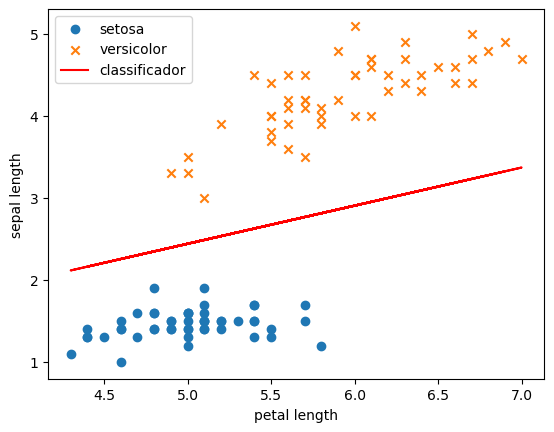

In [22]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classificador', color='red')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [23]:
misclassified_.append(erro)
print('Erro após 2a iteração =', np.abs(misclassified_))

Erro após 2a iteração = [1. 1.]


## Erro de classificação :

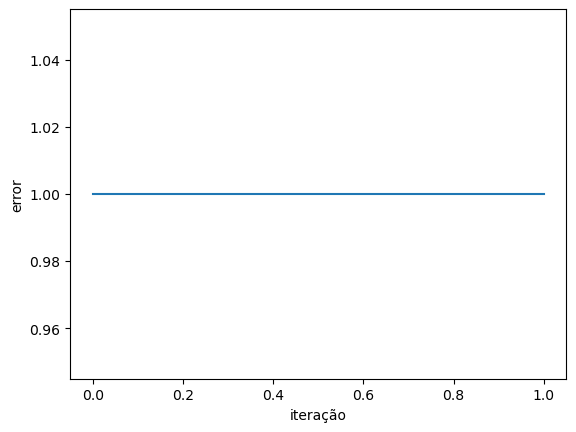

In [24]:
plt.plot(range(len(misclassified_)),np.abs(misclassified_))
plt.xlabel('iteração')
plt.ylabel('error')
plt.show()

## Visualização do classificador :

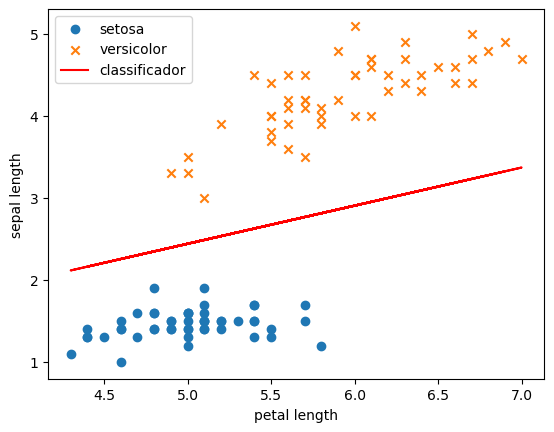

In [25]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classificador', color='red')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## API

In [26]:
nova_planta = np.array([1, 6.7, 5.2])
classe_planta_nova = np.dot(w,nova_planta.transpose())
print('Valor do classificador =' + '' + str(classe_planta_nova))
classe_final = 'Versicolor' if (classe_planta_nova > 0) else 'Setosa'
print('A nova planta é da espécie:' , classe_final)

Valor do classificador =[1.692]
A nova planta é da espécie: Versicolor
